In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv').sample(n=1000)
# df = df.reindex(np.random.permutation(df.index)) # shuffling the data
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,359.762000,10.468000,545.256000,0.535767,0.976000,0.677167,11.000000,3.468000,4.666000,1.295,...,0.096525,0.763544,-0.262560,-0.524316,-0.110544,0.291450,0.078139,0.334911,0.161339,3256.010000
std,215.065722,2.034973,456.679823,0.132307,0.153126,0.144900,10.550418,4.528077,8.315503,3.809,...,0.072146,0.241661,0.129969,0.287018,0.103661,0.325287,0.273131,0.192538,0.233786,6938.182923
min,11.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,116.000000
25%,161.750000,9.000000,244.000000,0.470928,1.000000,0.623235,4.750000,1.000000,1.000000,0.000,...,0.050000,0.600000,-0.331146,-0.700000,-0.125000,0.000000,0.000000,0.142857,0.000000,966.500000
50%,356.500000,10.000000,406.500000,0.543930,1.000000,0.693661,8.000000,3.000000,1.000000,0.000,...,0.100000,0.800000,-0.252083,-0.500000,-0.100000,0.200000,0.000000,0.500000,0.024053,1500.000000
75%,546.000000,12.000000,712.500000,0.614770,1.000000,0.755709,14.000000,4.000000,4.250000,1.000,...,0.100000,1.000000,-0.189846,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,17.000000,3467.000000,0.873016,1.000000,0.962963,82.000000,74.000000,93.000000,33.000,...,0.600000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,115700.000000


In [3]:
df.dtypes[df.dtypes != np.float64]

url        object
 shares     int64
dtype: object

In [4]:
X = df[df.columns[df.dtypes == np.float64]]
y = df[' shares']
X.shape, y.shape
X.shape, y.shape

((1000, 59), (1000,))

In [5]:
crr = pd.DataFrame(np.corrcoef(X.T), columns=X.columns, index=X.columns)

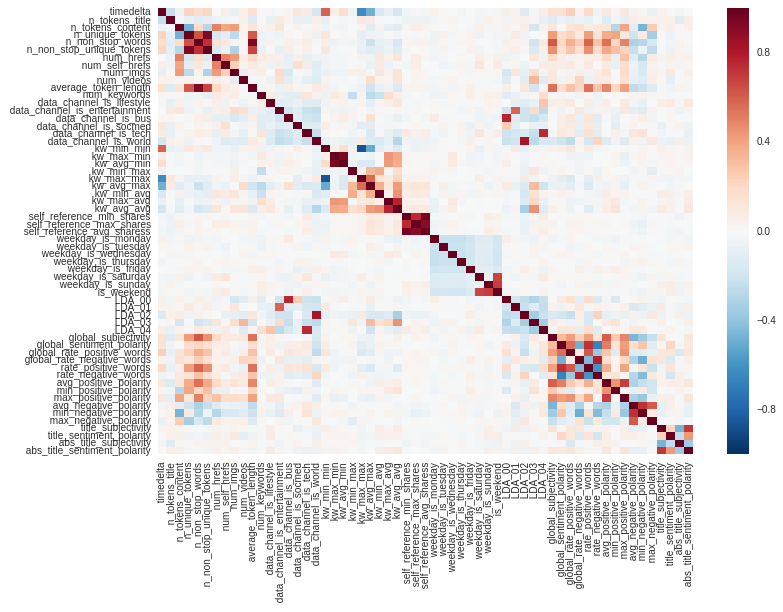

In [6]:
sns.heatmap(crr)

In [7]:
np.log(y).describe()

count    1000.000000
mean        7.502269
std         0.899818
min         4.753590
25%         6.873681
50%         7.313220
75%         7.937375
max        11.658756
Name:  shares, dtype: float64

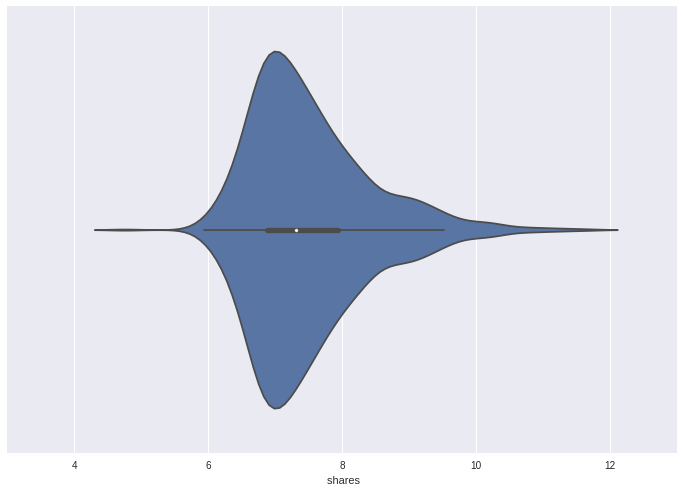

In [8]:
sns.violinplot(np.log(y))

In [9]:
x_2 = TSNE().fit_transform(X) 

In [10]:
x_2.shape

(1000, 2)

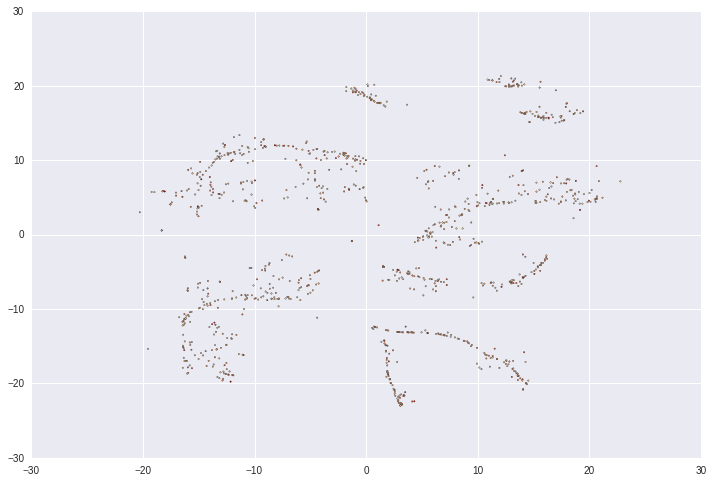

In [11]:
plt.scatter(x_2[:, 0], x_2[:, 1], c = np.log(y), cmap='OrRd', s=2)
plt.savefig('figure.svg', format='svg')

In [12]:
from scipy.stats import normaltest

In [13]:
normaltest(np.log(y))

NormaltestResult(statistic=192.12388768896659, pvalue=1.9090964384782907e-42)

In [14]:
from sklearn.cluster import KMeans
model = KMeans()
model.fit(X)
ll = model.predict(X)

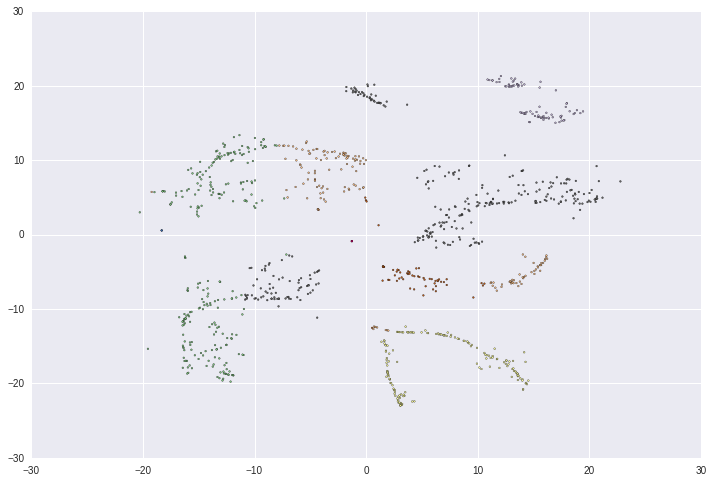

In [15]:
plt.scatter(x_2[:, 0], x_2[:, 1], c=ll, cmap='Accent', s=3)

In [17]:
df['cluster'] = ll

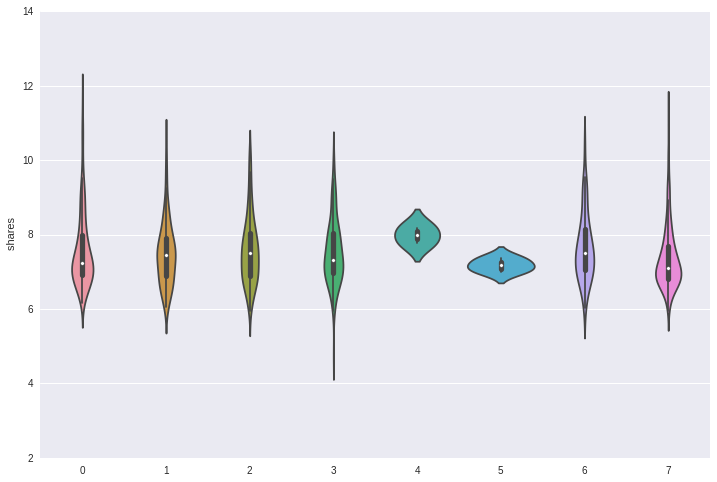

In [18]:
sns.violinplot(x=ll, y=np.log(y))